In [174]:
import json
import py.myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator


#
def first_return_map(params, recalculate=True, recompile=True):
    script = "first_return_map"
    prefix = script
    params_str = json.dumps(params)
    #
    filename = prefix + " " + params_str
    filename = filename[:min(len(filename), 200)]
    filename_bin = f"output_bin/{filename}.bin"
    #
    if recalculate or not os.path.isfile(filename_bin):
        my.run_cpp(script, params=params_str, recompile=recompile)
    #
    # image
    v_, p_, t_return, zero_count = my.get_binary(filename_bin).copy()
    # print(*zip(v_,p_))
    # v_ = np.where(p_ == 0, np.nan, v_)
    # p_ = np.where(p_ == 0, np.nan, p_)
    # p_ = np.where(p_ == 0, np.nan, p_)
    diff_ = np.abs(np.diff(p_, prepend=p_[0]))
    discontinuities = (diff_ > 10*np.mean(diff_)) 
    p0 = np.where(discontinuities, np.nan, p_)
    t0 = np.where(discontinuities, np.nan, t_return)
    z0 = np.where(discontinuities, np.nan, zero_count)
    # print(np.max(t_return))
    # print(np.max(zero_count))
    t_return = np.where(t_return == 0, np.nan, t_return)
    fig, ax = plt.subplots()
    #
    ax.plot(v_, p_, c='b', lw=1, linestyle=':')
    ax.plot(v_, p0, c='b', lw=2)
    ax.scatter(v_, p0, marker='|', c='k', s=2)
    ax.plot(v_, v_*0, c='k')
    ax.plot(v_, v_,   c='k')
    ax.set_ylabel('$|p|$', color='b', rotation=0)
    ax.tick_params(axis='y', labelcolor='b')
    ax.dataLim.y1 = np.nanmax(p_)*1.05
    # ax.dataLim.y1 = 2 
    #
    ax_t = ax.twinx()
    ax_t.plot(v_, t_return, c='r', lw=1, linestyle=':')
    ax_t.plot(v_, t0, c='r', lw=2)
    ax_t.set_ylabel('t_0', color='r', rotation=0)
    ax_t.tick_params(axis='y', labelcolor='r')
    ax_t.dataLim.y0 = 0 
    #
    ax_z = ax.twinx()
    ax_z.plot(v_, z0, c='orange')
    ax_z.plot(v_, zero_count, c='orange', lw=1, linestyle=':')
    ax_z.set_ylabel('zero count', color='orange')
    ax_z.tick_params(axis='y', labelcolor='orange')
    ax_z.spines.right.set_position(("axes", 1.15))
    ax_z.dataLim.y0 = 0 
    ax_z.yaxis.set_major_locator(MaxNLocator(integer=True))
    fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
    # os.system(f"kitten icat 'output_img/{filename}.jpg'")
    # plt.clf()

def single_solution(params, recalculate=True, recompile=True, scatter=True):
    script = "single_solution"
    prefix = script
    params_str = json.dumps(params)
    #
    filename = prefix + " " + params_str
    filename = filename[:min(len(filename), 200)]
    
    filename_bin = f"output_bin/{filename}.bin"
    #
    if recalculate or not os.path.isfile(filename_bin):
        my.run_cpp(script, params=params_str, recompile=recompile)
        
        
    #
    # just solution
    x_, dx_, t_ = my.get_binary(filename_bin)
    # plt.clf()
    plt.plot(t_, x_)
    plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000)
    # os.system(f"kitten icat 'output_img/{filename}.jpg'")

    # # parametric
    # x_, dx_, t_ = my.get_binary(f"output_bin/{filename}.bin")
    # plt.clf()
    # plt.plot(x_, dx_)
    # plt.savefig(f"output_img/{filename} (phase space projection).jpg", format="jpg", dpi=1000)
    # # os.system(f"kitten icat 'output_img/{filename}.jpg'")


In [53]:

# params = dict(
#         size = 100,
#         mode = "l1l2", 
#         x_start = -5, x_finish = 5,
#         y_start = -5, y_finish = 5,
#         d = -1, tau = 1,
#         v_start = 0.01, v_finish = 10, v_n = 50,
#         t_finish = 25, h = 0.01,
# )






In [159]:
recalculate = recompile = True


In [143]:

recalculate = recompile = False

In [246]:
params = dict(
        comment="chaotic region",
        size = 100,
        mode = "reim", 
        x_start = 0, x_finish = 0.5,
        y_start = 0, y_finish = 3.,
        d = 1, tau = 1,
        v_start = 0.01, v_finish = 10, v_n = 10000,
        t_finish = 30, h = 0.01,
)

params = dict(
        comment="chaotic region zoom",
        size = 50,
        mode = "reim", 
        x_start = 0, x_finish = 0.2,
        y_start = 1, y_finish = 2.,
        d = 1, tau = 1,
        v_start = 0.0001, v_finish = 10, v_n = 10000,
        t_finish = 2000, h = 0.005,
        expspace=True,
)

In [68]:
params = dict(
        size = 50,
        mode = "reim", 
        x_start = -2, x_finish = 2,
        y_start = 0, y_finish = 10,
        d = -1, tau = 1,
        v_start = 0.01, v_finish = 10, v_n = 5000,
        t_finish = 25, h = 0.01,
)



In [ ]:


# params = dict(
#         size = 100,
#         mode = "l1l2", 
#         x_start = -5, x_finish = 5,
#         y_start = -5, y_finish = 5,
#         d = 1, tau = 1,
#         v_start = 0.01, v_finish = 10, v_n = 500,
#         t_finish = 25, h = 0.01,
# )



script = "fixed_points_count"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]
filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# data
count_stable, count_unstable = my.get_binary(f"output_bin/{filename}.bin").copy()
xs = np.linspace(params["x_start"], params["x_finish"], params["size"])
ys = np.linspace(params["y_start"], params["y_finish"], params["size"])
# figure
fig, ax = plt.subplots(1,2, figsize=(10,4))
vmax=max(np.max(count_stable), np.max(count_unstable))+1
# cmap = 'inferno'
cmap = plt.get_cmap('turbo', vmax)
im = ax[0].pcolormesh(xs, ys, count_stable, cmap=cmap, vmin=0,vmax=vmax)
plt.colorbar(im,ax=ax[0],
             ticks=np.arange(np.max(count_stable)+1),
             boundaries=np.arange(np.max(count_stable)+2)-0.5,
            fraction=0.046, pad=0.04)
im = ax[1].pcolormesh(xs, ys, count_unstable, cmap=cmap,vmin=0,vmax=vmax)
plt.colorbar(im,ax=ax[1],
             ticks=np.arange(np.max(count_unstable)+1),
             boundaries=np.arange(np.max(count_unstable)+2)-0.5,
            fraction=0.046, pad=0.04)

ax[0].set_aspect((params["x_finish"]-params["x_start"])/((params["y_finish"]-params["y_start"])))
ax[1].set_aspect((params["x_finish"]-params["x_start"])/((params["y_finish"]-params["y_start"])))

# saving
fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
# os.system(f"kitten icat 'output_img/{filename}.jpg'")



~~~ cpp/fixed_points_count.cpp is executed ~~~
~~~  parameters: {"comment": "chaotic region zoom", "size": 50, "mode": "reim", "x_start": 0, "x_finish": 0.2, "y_start": 1, "y_finish": 2.0, "d": 1, "tau": 1, "v_start": 0.0001, "v_finish": 10, "v_n": 10000, "t_finish": 2000, "h": 0.005, "expspace": true} ~~~


In [43]:
np.arange(4)

array([0, 1, 2, 3])

~~~ cpp/first_return_map.cpp is executed ~~~
~~~  parameters: {"comment": "chaotic region zoom", "size": 50, "mode": "reim", "x_start": 0, "x_finish": 0.2, "y_start": 1, "y_finish": 2.0, "d": 1, "tau": 1, "v_start": 0.001, "v_finish": 10, "v_n": 1000, "t_finish": 1000, "h": 0.01, "expspace": true, "b": -0.1, "c": 1.6925000000000001} ~~~
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 0:0:0 / 0:0:0                                         ~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
(0.042230441872066767, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378) (0.06277660105806507, 0.5953533130814378)


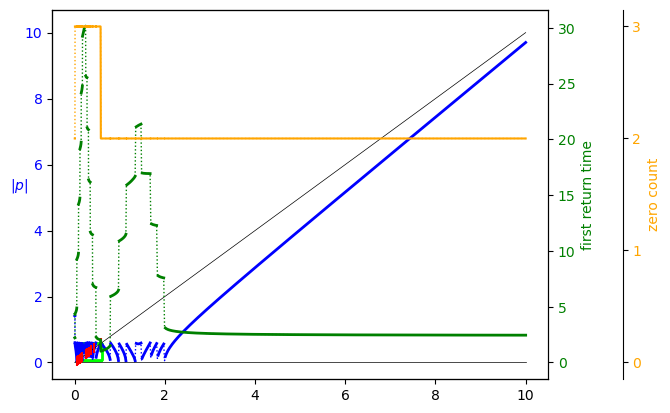

In [243]:
# l1=2
# l2=1
# params.update(
#         b = -(l1+l2),
#         c = l1*l2,
#         v_n = 50000
# )

re=0.05
im=1.3
params.update(
        b = -2 * re,
        c = re*re + im*im,
        v_n = 1000,
        t_finish = 1000,
        v_start = 0.001,
        v_finish = 10,
        h = 0.01
)

script = "first_return_map"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]
filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)
#
# image
v_, p_, t_return, zero_count = my.get_binary(filename_bin).copy()
v_stable = my.get_binary(f"output_bin/{filename}.stable_fixed_points.bin")
v_unstable = my.get_binary(f"output_bin/{filename}.unstable_fixed_points.bin")
intervals_l, intervals_r = my.get_binary(f"output_bin/{filename}.invariant_interval.bin")

print(*zip(intervals_l, intervals_r))

# print(*zip(v_,p_))
# v_ = np.where(p_ == 0, np.nan, v_)
# p_ = np.where(p_ == 0, np.nan, p_)
# p_ = np.where(p_ == 0, np.nan, p_)
diff_ = np.abs(np.diff(p_, prepend=p_[0]))
discontinuities = (diff_ > 10*np.mean(diff_)) 
p0 = np.where(discontinuities, np.nan, p_)
t0 = np.where(discontinuities, np.nan, t_return)
z0 = np.where(discontinuities, np.nan, zero_count)
# print(np.max(t_return))
# print(np.max(zero_count))
t_return = np.where(t_return == 0, np.nan, t_return)
fig, ax = plt.subplots()
#
ax.plot(v_, p_, c='b', lw=1, linestyle=':')
ax.plot(v_, p0, c='b', lw=2)
# ax.scatter(v_, p0, marker='|', c='k', s=2)
ax.plot(v_, v_*0, c='k',lw=0.5)
ax.plot(v_, v_,   c='k',lw=0.5)
ax.scatter(v_stable,   v_stable,   s=100, marker='|', c='#00FF00', zorder=1000)
ax.scatter(v_unstable, v_unstable, s=50, marker='|', c='r', zorder=1000)
ax.set_ylabel('$|p|$', color='b', rotation=0)
ax.tick_params(axis='y', labelcolor='b')
for i in range(len(intervals_l)):
    l = intervals_l[i]
    w = intervals_r[i] - intervals_l[i]
    ax.add_patch(Rectangle((l,l), w, w,fill=False, color='lime'))
ax.dataLim.y1 = np.nanmax(p_)*1.05

# ax.dataLim.y1 = min(np.nanmax(p_)*1.05, np.nanmax(v_)*2)
# ax.dataLim.y1 = 2 
#
ax_t = ax.twinx()
ax_t.plot(v_, t_return, c='g', lw=1, linestyle=':')
ax_t.plot(v_, t0, c='g', lw=2)
ax_t.set_ylabel('first return time', color='g')
ax_t.tick_params(axis='y', labelcolor='g')
ax_t.dataLim.y0 = 0 
#
ax_z = ax.twinx()
ax_z.plot(v_, z0, c='orange')
ax_z.plot(v_, zero_count, c='orange', lw=1, linestyle=':')
ax_z.set_ylabel('zero count', color='orange')
ax_z.tick_params(axis='y', labelcolor='orange')
ax_z.spines.right.set_position(("axes", 1.15))
ax_z.dataLim.y0 = 0 
ax_z.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
# os.system(f"kitten icat 'output_img/{filename}.jpg'")
# plt.clf()

~~~ cpp/single_solution.cpp is executed ~~~
~~~  parameters: {"comment": "chaotic region zoom", "size": 50, "mode": "reim", "x_start": 0, "x_finish": 0.2, "y_start": 1, "y_finish": 2.0, "d": 1, "tau": 1, "v_start": 0.001, "v_finish": 2, "v_n": 10000, "t_finish": 100, "h": 0.001, "b": -0.02, "c": 1.6901000000000002, "v": 1.5} ~~~


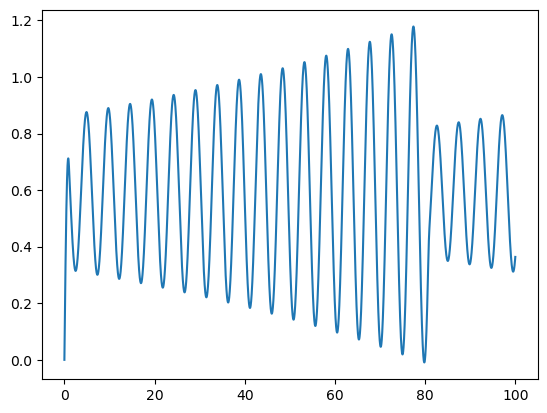

In [210]:
params.update(
    v = 1.5,
    t_finish=100,
)
single_solution(params, recalculate=recalculate, recompile=recompile)


~~~ cpp/first_return_map.cpp is executed ~~~
~~~  parameters: {"size": 100, "mode": "reim", "x_start": -0.2, "x_finish": 0.4, "y_start": 0, "y_finish": 10, "d": -1, "tau": 1, "v_start": 0.01, "v_finish": 30, "v_n": 500, "t_finish": 25, "h": 0.01, "b": 0.4, "c": 36.04, "expspace": true} ~~~
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
3.201919601724321
54.0


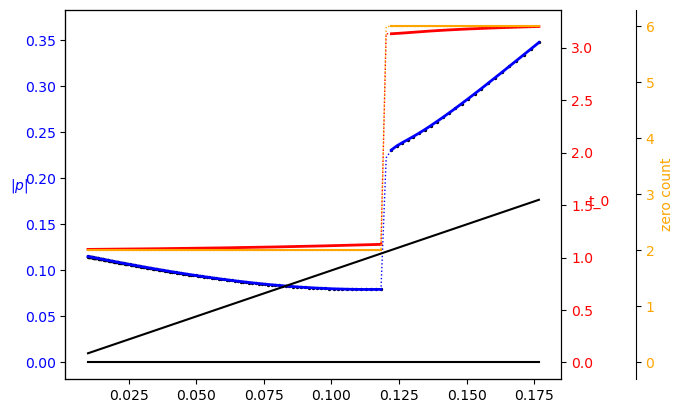

In [76]:
re=-0.2
im=6
params.update(
        b = -2 * re,
        c = re*re + im*im,
        v_n = 5000,
        expspace=True
)
first_return_map(params, recalculate=recalculate, recompile=recompile)

params = dict(
    # b = -0.2, c = 1, d = 1, tau = 1, 
    v = 1,
    # t_finish = 50, h = 0.01, comment = "lorenz attractor"
)
#



False

~~~ cpp/first_return_map.cpp is executed ~~~
~~~  parameters: {"comment": "chaotic region zoom", "size": 100, "mode": "reim", "x_start": 0, "x_finish": 0.2, "y_start": 1, "y_finish": 2.0, "d": 1, "tau": 1, "v_start": 0.0001, "v_finish": 2, "v_n": 100000, "t_finish": 30, "h": 0.01, "b": -0.14, "c": 2.7605, "expspace": true} ~~~
~~~ Computation took 0:0:4 (hh:mm:ss) ~~~


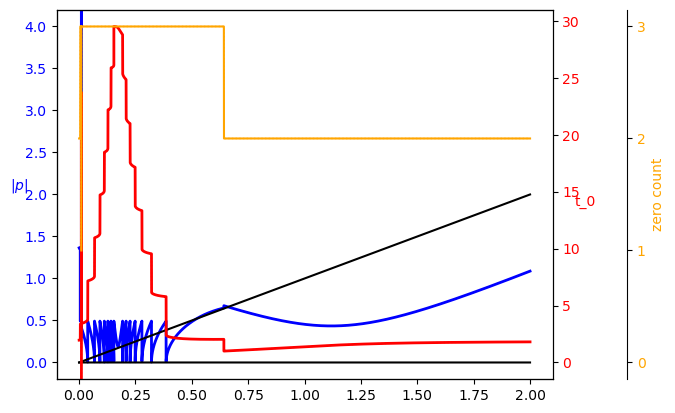

In [205]:
os.path.isfile(r"\\?\\home\dbain\signu\signu 2024\relay-dde-2nd-order\test.txt")

False

In [198]:
os.system("pwd")

/home/dbain/signu/signu 2024/relay-dde-2nd-order


0